In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
ds0 = xr.open_mfdataset('/glade/scratch/fvitt/archive/f2000_ubc_f09_32lev_cntrl01/atm/hist/f2000*h0.000[2-6]-*.nc')

h2ocntrl = ds0['H2O'].mean(dim=('time','lon'))

In [3]:
ds1 = xr.open_mfdataset('/glade/scratch/fvitt/archive/f2000_ubc_f09_32lev_test01/atm/hist/f2000*h0.000[2-6]-*.nc')

h2otest = ds1['H2O'].mean(dim=('time','lon'))

In [53]:
# WACCM zonal mean historical file
ubc_file='/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/ubc/f.e21.FWHISTBgcCrop.f09_f09_mg17.CMIP6-AMIP-WACCM.ensAvg123.cam.h0zm.UBC.195001-201412_c220322.nc'
dsw = xr.open_dataset(ubc_file)

In [57]:
waccm_h2o = dsw.sel(time = slice('1995-01-01','2005-01-12')).H2O.mean(dim='time')

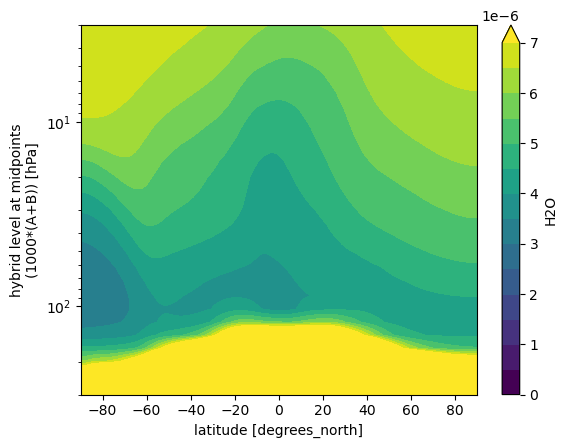

In [63]:
waccm_h2o.plot.contourf(yscale = 'log', vmin=0, vmax=7e-6, ylim=(300,3), levels=15)
plt.show()

In [50]:
!ls /glade/p/cesmdata/cseg/inputdata/atm/cam/chem/ubc/f.e21.*

/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/ubc/f.e21.FWHISTBgcCrop.f09_f09_mg17.CMIP6-AMIP-WACCM.ensAvg123.cam.h0zm.UBC.195001-201412_c220317.nc
/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/ubc/f.e21.FWHISTBgcCrop.f09_f09_mg17.CMIP6-AMIP-WACCM.ensAvg123.cam.h0zm.UBC.195001-201412_c220322.nc


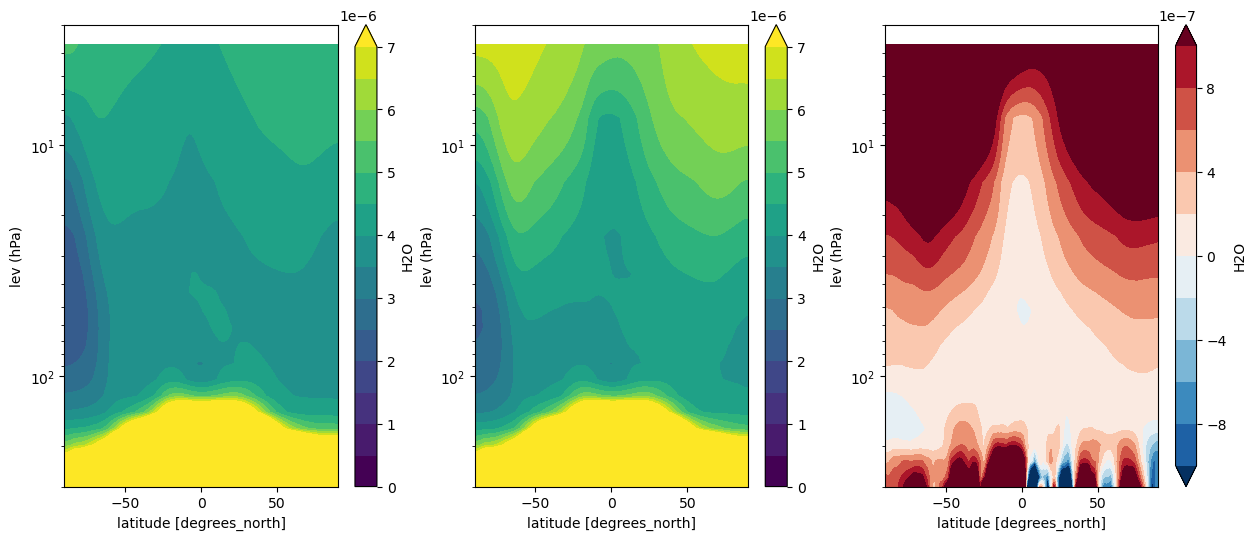

In [6]:
plt.subplots(nrows=1, ncols=3, figsize=(15,6))

plt.subplot(1, 3, 1)
h2ocntrl.plot.contourf(yscale = 'log', vmin=0, vmax=7e-6, ylim=(300,3), levels=15)
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.subplot(1, 3, 2)
h2otest.plot.contourf(yscale = 'log', vmin=0, vmax=7e-6, ylim=(300,3),levels=15)
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.subplot(1, 3, 3)
diff = h2otest - h2ocntrl
diff.plot.contourf(yscale = 'log', vmax=1e-6, ylim=(300,3), levels=11)
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.show()

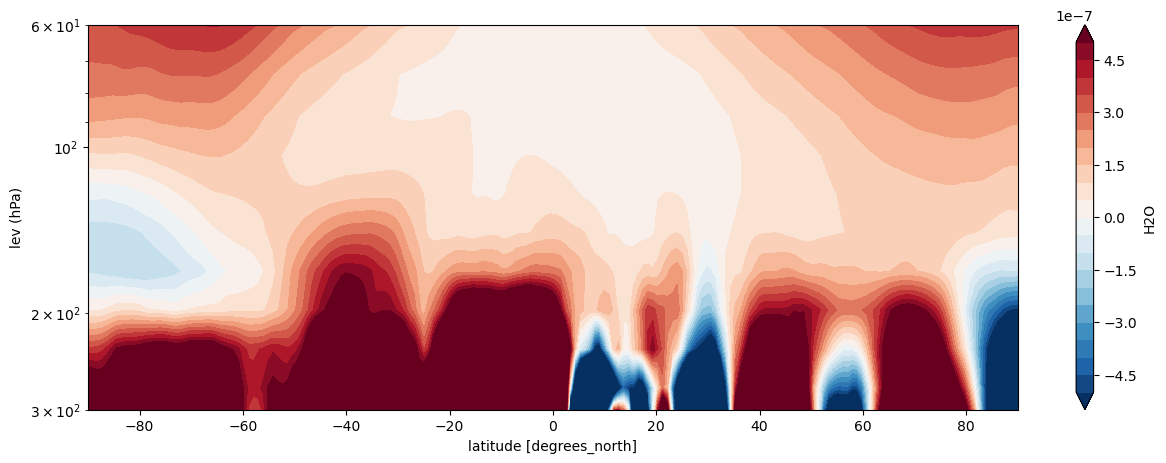

In [9]:
diff.plot.contourf(yscale = 'log', vmax=5e-7, ylim=(300,60), levels=21, figsize=(15,5))
ax = plt.gca()
ax.set_ylabel('lev (hPa)')

plt.show()

In [29]:
flds_ctrl = ds0['FLDS'].mean(dim=('time','lon'))
flds_test = ds1['FLDS'].mean(dim=('time','lon'))
flnsc_ctrl = ds0['FLNSC'].mean(dim=('time','lon'))
flnsc_test = ds1['FLNSC'].mean(dim=('time','lon'))

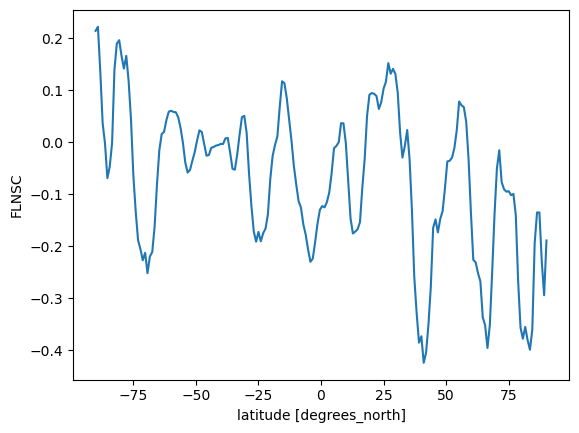

In [37]:
(flnsc_test-flnsc_ctrl).plot()
plt.show()

In [26]:
flnt_ctrl = ds0['FLNT'].mean(dim=('time','lon'))
flnt_test = ds1['FLNT'].mean(dim=('time','lon'))

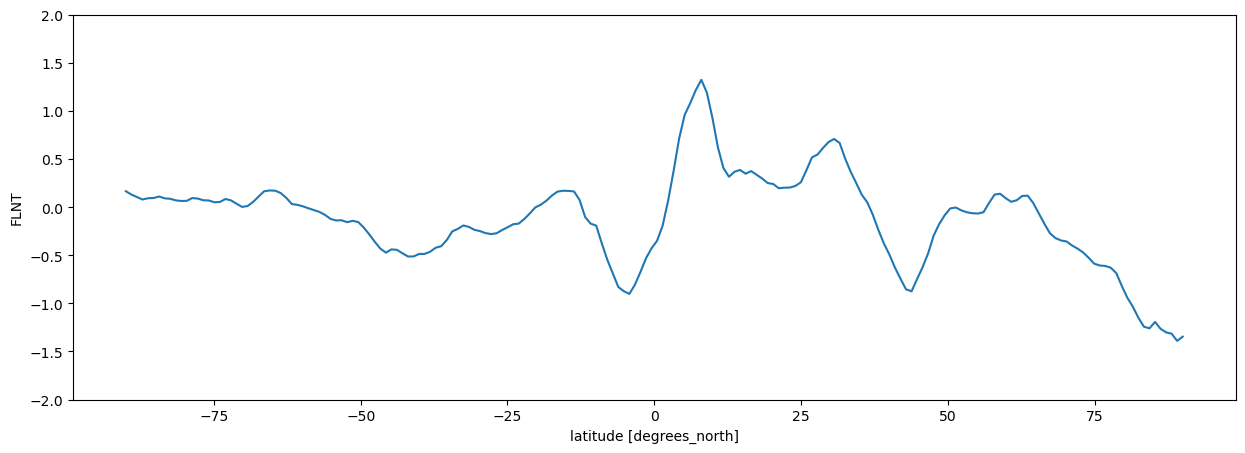

In [39]:
(flnt_test-flnt_ctrl).plot(figsize=(15,5), ylim=(-2,2))
plt.show()

In [33]:
#RESTOM = FSNT - FLNT
restom_ctrl = (ds0['FSNT']-ds0['FLNT']).mean(dim=('time','lon'))
restom_test = (ds1['FSNT']-ds1['FLNT']).mean(dim=('time','lon'))

In [47]:
weights = np.cos(np.deg2rad(ds0.lat))
weights.name = "weights"
rgmctrl = restom_ctrl.weighted(weights).mean('lat').values
rgmtest = restom_test.weighted(weights).mean('lat').values
print(rgmctrl, rgmtest, rgmtest-rgmctrl)

-2.0187270918384623 -2.0492581105340077 -0.03053101869554542


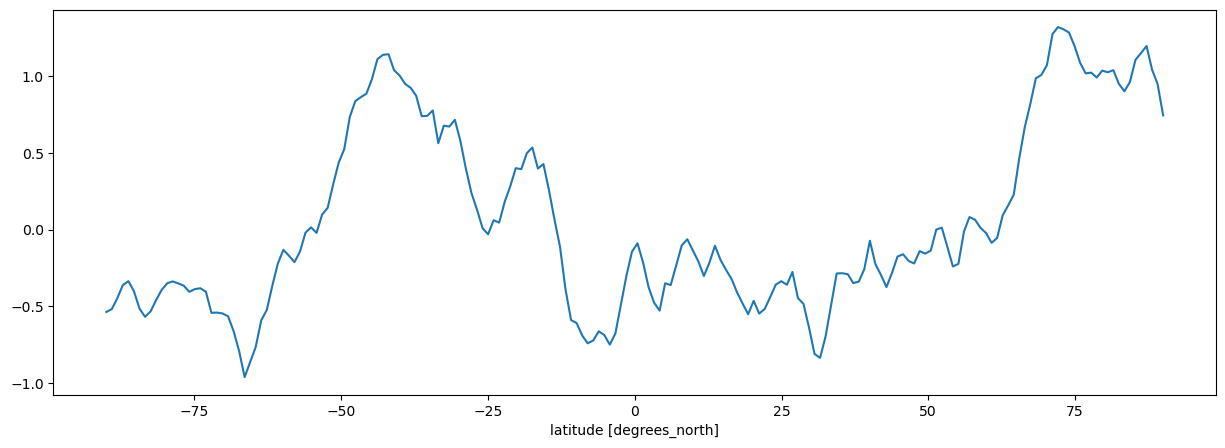

In [36]:
(restom_test-restom_ctrl).plot(figsize=(15,5))
plt.show()

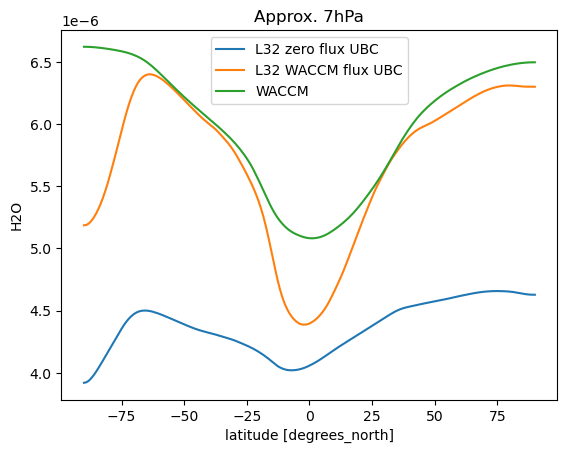

In [75]:
h2ocntrl.sel(lev=7., method='Nearest').plot(label='L32 zero flux UBC')
h2otest.sel(lev=7., method='Nearest').plot(label='L32 WACCM flux UBC')
waccm_h2o.sel(lev=7., method='Nearest').plot(label='WACCM')
ax = plt.gca()
ax.set_title('Approx. 7hPa')

plt.legend()
plt.show()

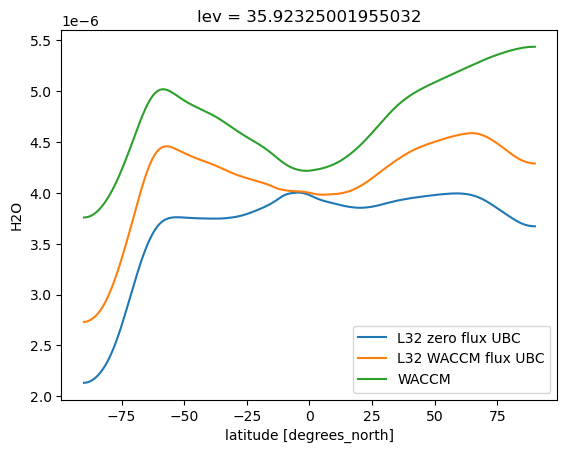

In [96]:
h2ocntrl.sel(lev=35., method='Nearest').plot(label='L32 zero flux UBC')
h2otest.sel(lev=35., method='Nearest').plot(label='L32 WACCM flux UBC')
waccm_h2o.sel(lev=35., method='Nearest').plot(label='WACCM')
ax = plt.gca()
#ax.set_title('Approx. 103 hPa')

plt.legend()
plt.show()

In [114]:
lev = 21
print(h2ocntrl.lev.sel(lev=lev, method='Nearest').values)
print(waccm_h2o.lev.sel(lev=lev, method='Nearest').values)


24.612220004200935
20.056750625371933


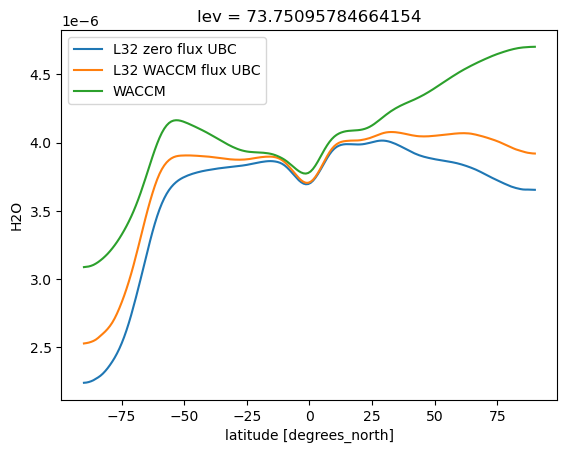

In [98]:
h2ocntrl.sel(lev=73., method='Nearest').plot(label='L32 zero flux UBC')
h2otest.sel(lev=73., method='Nearest').plot(label='L32 WACCM flux UBC')
waccm_h2o.sel(lev=73., method='Nearest').plot(label='WACCM')
ax = plt.gca()
#ax.set_title('Approx. 103 hPa')

plt.legend()
plt.show()